In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('datosLimpios.csv')
df.head()

,year,suicides_no,population,suicides/100k pop,gdp_for_year,gdp_per_capita,age_15-24,age_25-34,age_35-54,age_5-14,...,country_Thailand,country_Trinidad and Tobago,country_Turkey,country_Turkmenistan,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan
0,1987,21,312900,6.71,2.156625e+09,796.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1987,16,308000,5.19,2.156625e+09,796.0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,1987,14,289700,4.83,2.156625e+09,796.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1987,1,21800,4.59,2.156625e+09,796.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1987,9,274300,3.28,2.156625e+09,796.0,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


## Probabilidad de Suicidio

Se usará suicides/100k pop como independiente y todas las demas columnas del dataset como dependientes. Se usará el modelo de regresión lineal para predecir la probabilidad de suicidio en un país.

In [38]:
y = df["suicides/100k pop"]
X = df.drop(["suicides/100k pop"], axis=1)

In [39]:
bins = np.linspace(0, 224.97, 21)
labels = ["5%", "10%", "15%", "20%", "25%", "30%", "35%", "40%", "45%", "50%", "55%", "60%", "65%", "70%", "75%", "80%", "85%", "90%", "95%", "100%"]
y['suicides/100k pop'] = pd.cut(df["suicides/100k pop"], bins, labels=labels, include_lowest=True)
y = y['suicides/100k pop']
y.head()

0    5%
1    5%
2    5%
3    5%
4    5%
Name: suicides/100k pop, dtype: category
Categories (20, object): ['5%' < '10%' < '15%' < '20%' ... '85%' < '90%' < '95%' < '100%']

In [40]:
# separar en train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train)
print(X_test)

       year  suicides_no  population  gdp_for_year  gdp_per_capita  age_15-24  \
8280   2008            5      711888  1.798689e+10          3271.0      False   
3801   2015          529     1567729  4.550396e+11         42830.0      False   
5614   2014          536     2408469  2.605841e+11         15883.0      False   
10408  1988            1       11900  2.363575e+08          2707.0       True   
19371  1986           36      298812  3.874972e+10          4145.0      False   
...     ...          ...         ...           ...             ...        ...   
21575  2010            0       13885  1.381968e+09          8557.0      False   
5390   1995           32     1219884  7.344706e+10          5695.0       True   
860    2007          155     4601874  2.875305e+11          7918.0      False   
15795  2010            0       30688  2.588176e+09          7806.0      False   
23654  1995          273     4106700  6.129397e+11         16444.0      False   

       age_25-34  age_35-54

In [41]:
# normalización de los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train)
print(X_test)

[[ 0.7923205  -0.25736299 -0.29012401 ... -0.11541597 -0.11334248
  -0.09658843]
 [ 1.61786429  0.30929564 -0.07192141 ... -0.11541597 -0.11334248
  -0.09658843]
 [ 1.49992946  0.3168655   0.14243109 ... -0.11541597 -0.11334248
  -0.09658843]
 ...
 [ 0.67438567 -0.09515155  0.70165492 ... -0.11541597 -0.11334248
  -0.09658843]
 [ 1.02819015 -0.26277004 -0.46380068 ... -0.11541597 -0.11334248
  -0.09658843]
 [-0.74083226  0.03245478  0.57540687 ... -0.11541597 -0.11334248
  -0.09658843]]
[[ 1.61786429 -0.26168863 -0.21979108 ... -0.11541597 -0.11334248
  -0.09658843]
 [-0.0332233  -0.22924634 -0.41483442 ... -0.11541597 -0.11334248
  -0.09658843]
 [ 1.38199464 -0.24222325 -0.280878   ... -0.11541597 -0.11334248
  -0.09658843]
 ...
 [-0.97670192 -0.2584444  -0.11670689 ... -0.11541597 -0.11334248
  -0.09658843]
 [ 1.26405981 -0.14057075  1.96057468 ... -0.11541597 -0.11334248
  -0.09658843]
 [ 1.38199464 -0.1459778  -0.32199797 ... -0.11541597 -0.11334248
  -0.09658843]]


In [42]:
from sklearn.linear_model import LogisticRegression

# Instanciando el modelo con n_jobs=-1
logisticRegr = LogisticRegression(n_jobs=-1)

logisticRegr.fit(X_train, y_train)
score = logisticRegr.score(X_test, y_test)
print(score)

0.8291397076443805


0.8291397076443805


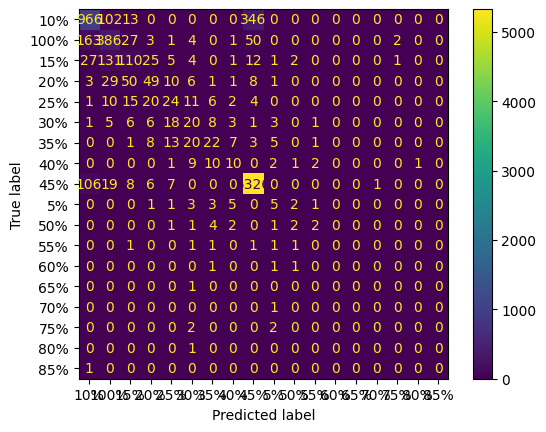

In [43]:
# graficar la matriz de confusión
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score

conf = confusion_matrix(y_test, logisticRegr.predict(X_test))
accuracy = accuracy_score(y_test, logisticRegr.predict(X_test))
print(accuracy)

disp = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=logisticRegr.classes_)
disp.plot()

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test, logisticRegr.predict(X_test)))

              precision    recall  f1-score   support

         10%       0.76      0.68      0.72      1427
         15%       0.57      0.61      0.59       637
         20%       0.48      0.34      0.40       319
         25%       0.42      0.31      0.36       158
         30%       0.30      0.26      0.28        93
         35%       0.24      0.28      0.26        72
         40%       0.39      0.28      0.32        80
         45%       0.31      0.28      0.29        36
          5%       0.93      0.97      0.95      5473
         50%       0.22      0.24      0.23        21
         55%       0.22      0.15      0.18        13
         60%       0.00      0.00      0.00         6
         65%       0.00      0.00      0.00         3
         70%       0.00      0.00      0.00         1
         75%       0.00      0.00      0.00         1
         80%       0.00      0.00      0.00         4
         85%       0.00      0.00      0.00         1
         95%       0.00    

## Mejoramiento del modelo

In [45]:
# Mejorar el modelo con GridSearchCV
from sklearn.model_selection import GridSearchCV

# Definir los parámetros que quieres ajustar
param_grid = {
    'penalty': ['l1', 'l2', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'saga'], 
    'max_iter': [100]
}

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, n_jobs=-1)

# Ajustar el modelo a los datos
grid_search.fit(X_train, y_train)

# Imprimir los mejores parámetros encontrados
print(grid_search.best_params_)

# Usar el mejor modelo para predecir
best_model = grid_search.best_estimator_
score = best_model.score(X_test, y_test)
print(score)

{'C': 100, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.8620896237718667


0.8620896237718667


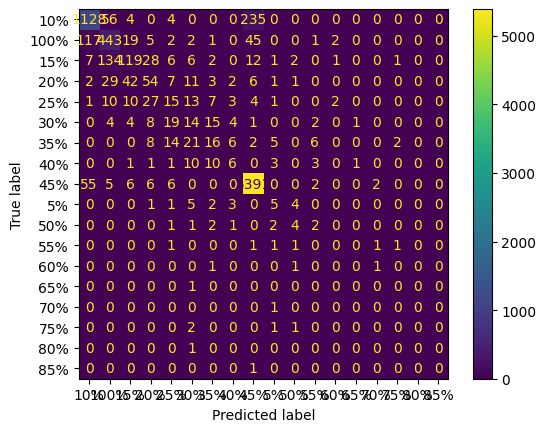

In [46]:
conf = confusion_matrix(y_test, best_model.predict(X_test))
accuracy = accuracy_score(y_test, best_model.predict(X_test))
print(accuracy)

disp = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=best_model.classes_)
disp.plot()

In [47]:
print(classification_report(y_test, best_model.predict(X_test)))

              precision    recall  f1-score   support

         10%       0.86      0.79      0.82      1427
         15%       0.65      0.70      0.67       637
         20%       0.58      0.37      0.45       319
         25%       0.39      0.34      0.36       158
         30%       0.19      0.16      0.18        93
         35%       0.16      0.19      0.18        72
         40%       0.27      0.20      0.23        80
         45%       0.24      0.17      0.20        36
          5%       0.95      0.99      0.97      5473
         50%       0.24      0.24      0.24        21
         55%       0.29      0.31      0.30        13
         60%       0.00      0.00      0.00         6
         65%       0.00      0.00      0.00         3
         70%       0.00      0.00      0.00         1
         75%       0.00      0.00      0.00         1
         80%       0.00      0.00      0.00         4
         85%       0.00      0.00      0.00         1
         95%       0.00    

In [49]:
# Obtener y mostrar los coeficientes
feature_names = X.columns
coefficients = logisticRegr.coef_[0]
feature_importance = pd.DataFrame(coefficients, index=feature_names, columns=['Coefficient']).sort_values(by='Coefficient', ascending=False)


                         Coefficient
population                  7.012216
age_15-24                   1.127748
country_Colombia            0.927210
country_Mexico              0.897412
gdp_per_capita              0.872206
...                              ...
country_Kuwait             -0.889292
generation_Generation Z    -1.715209
age_75+                    -1.828987
sex_male                   -3.429798
suicides_no                -6.682252

[119 rows x 1 columns]


In [50]:
feature_importance.head(15)

,Coefficient
population,7.012216
age_15-24,1.127748
country_Colombia,0.927210
country_Mexico,0.897412
gdp_per_capita,0.872206
country_Ecuador,0.867848
country_Greece,0.863995
country_Guatemala,0.831186
country_Paraguay,0.790549
country_Albania,0.699718
